# Predicting companies getting attacked by a hedge fund

In this notebook, Python-based Machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a company getting attacked by a hedge fun or not.

We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling

## Problem Definition

> The original dataset has 32 variables including the companies that got attacked by a hedge fund. We will analyze the dataset and find a line. The area above the line is positive (1) and area below it is negetive (0)

here,
- 0 : Companies will not get attacked by hedge fund
- 1 : Companies will get attacked by hedge fund

## Evaluation
If we can reach 95% accuracy at predicting, we'll pursue the project.



## Features

1. Attack: Shows which companies got attacked.
2. Size_of_Group_Composition: oup composition is usually considered in terms of how individual member characteristics will affect group cohesion or compatibility and subsequently how the group interacts.
3. Bankruptcy probability: Bankruptcy risk refers to the likelihood that a company will be unable to meet its debt obligations. It is the probability of a firm becoming insolvent due to its inability to service its debt.
4. Debt coefficient: The debt ratio measures the amount of leverage used by a company in terms of total debt to total assets. A debt ratio greater than 1.0 (100%) tells you that a company has more debt than assets.
5. Solvency: Solvency is the ability of a company to meet its long-term debts and financial obligations.
6. Invested Capital: Invested capital is the total amount of money raised by a company by issuing securities to equity shareholders and debt to bondholders, where the total debt and capital lease obligations are added to the amount of equity issued to investors.
7. Net equity: Net equity value is defined as the difference between the fair market value of business assets and its liabilities.
8. ROA: Return on assets (ROA) is a financial ratio that shows the percentage of profit that a company earns in relation to its overall resources (total assets).
9. ROCE: Return on capital employed (ROCE) is a financial ratio that can be used in assessing a company's profitability and capital efficiency. In other words, the ratio can help to understand how well a company is generating profits from its capital.
10. R&D expenses: Research and development (R&D) expenses are associated directly with the research and development of a company's goods or services and any intellectual property generated in the process.

### Preparing the tools

We're going to use `pandas`, `Matplotlib` and `NumPy` for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit-learn (sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load the data

In [6]:
data = pd.read_csv("data/databaseenglish.csv")
#It whill show how many row and columns are present in the dataset
data.shape

(1407, 32)

We have 1407 rows and 32 columns

### Data Exploration (exploratory data analysis or EDA)¶
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

In [8]:
data.head()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
0,1000MERCIS,0,NaN,8.0,B+,16,3,3,2,14,...,-90.683428,-0.773921,1.80597,2.833689,19.707874,22.18232,10.752391,17.19676,-2.130997,10.63491
1,2CRSI,0,NaN,2.0,D,17,1,1,1,10,...,NaN,NaN,NaN,NaN,16.842874,38.42932,4.496391,19.73776,-2.130997,-2.84809
2,A S T GROUPE,0,NaN,17.0,A+,10,3,3,0,18,...,-106.614428,0.226079,1.80597,1.833689,29.717874,32.15032,9.710391,20.98376,-2.130997,1.10291
3,A TOUTE VITESSE,0,NaN,2.0,D,1,1,1,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2MICILE EUROPE,0,NaN,85.0,B+,6,3,3,2,8,...,NaN,3.226079,-2.19403,-1.166311,24.217874,40.58732,8.750391,14.79276,-2.130997,-2.04609


In [9]:
data.tail()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
1402,LATECOERE,1,2018.0,24.0,D,13,5,5,5,60,...,-419.965647,1.304060,2.809989,2.878393,14.126546,10.787897,4.244722,11.326027,0.612442,-1.503889
1403,RENAULT,1,2019.0,697.0,B+,54,0,0,0,127,...,-352.829515,-1.866603,-2.210870,-0.109783,18.726344,23.305537,5.620795,17.239848,0.692457,2.665476
1404,SAFRAN,1,2017.0,420.0,A+,81,0,0,0,151,...,-92.513428,-0.773921,-3.194030,-4.166311,26.359874,41.313320,9.433391,24.008760,6.734003,7.713910
1405,TECHNICOLOR,1,2012.0,213.0,A+,29,0,0,0,73,...,-272.024371,NaN,-3.393283,-4.235103,-7.692155,-159.103644,-8.561945,-9.298498,0.917908,-13.363271
1406,VIVENDI SE,1,2015.0,1999.0,B+,80,1,1,1,166,...,-99.458689,-1.897196,0.820383,0.856710,14.448834,12.369821,6.117768,24.674105,-2.364043,4.546298


In [10]:
# let's find out how many of each class there
data["attack"].value_counts()

0    1376
1      31
Name: attack, dtype: int64

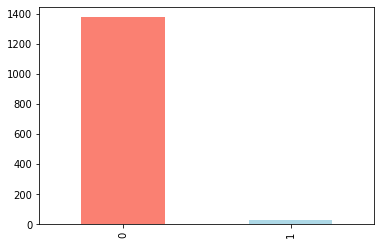

In [11]:
data["attack"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

As we can see the probability of finding attacked companies (Probability of getting 1) is very low. We have 31 companies that got attacked by Hedge fund adn 1376 that never got attacked.

### Let's find the probability in percentage (%)

In [14]:
attacked = 31
not_attacked = 1376

probability_of_getting_attacked = 31 / (31+1376)
probability_of_not_getting_attacked = 1376/(31+1376)
print(f'Probability of getting attacked: {probability_of_getting_attacked * 100:.1f}%')
print(f'Probability of not getting attacked: {probability_of_not_getting_attacked * 100:.2f}%')

Probability of getting attacked: 2.2%
Probability of not getting attacked: 97.80%


In [15]:
# Let's find some other insofrmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   company_name                                             1407 non-null   object 
 1   attack                                                   1407 non-null   int64  
 2   year_attack                                              31 non-null     float64
 3   Size_of_Group_Composition                                1385 non-null   float64
 4   BvD_independent_indicator                                1407 non-null   object 
 5   Number_of_shareholders                                   1407 non-null   int64  
 6   Number_of_effective_beneficiaries_def_10_10              1407 non-null   int64  
 7   Number_of_effective_beneficiaries_def_10_50              1407 non-null   int64  
 8   Number_of_effective_benefici

### Let's find the missing values

In [16]:
# Let's find out how many missing values are in there
data.isna().sum()

company_name                                                  0
attack                                                        0
year_attack                                                1376
Size_of_Group_Composition                                    22
BvD_independent_indicator                                     0
Number_of_shareholders                                        0
Number_of_effective_beneficiaries_def_10_10                   0
Number_of_effective_beneficiaries_def_10_50                   0
Number_of_effective_beneficiaries_def_25_25                   0
Number_of_leaders                                             0
Number_of_current_leaders                                     0
Number_of_Previous_Leader                                     0
DM_As_any_category                                           29
Manager_Gender                                              101
Manager_Age                                                   0
Manager_Age_group                       

##### There are huge number of missing values

We can follow two steps to solve the problem:
1. Remove the missing rows
2. Fill the missing rows with average / Imaginary Values 

> We will fill the missing data. If we remove the rows, our dataset will get smaller which is not good for the Machine Learning Model to predict accurately